# Clustering con Python

# importar el dataset

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('../python-ml-course-master/python-ml-course-master/datasets/wine/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

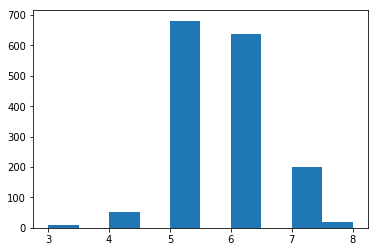

In [7]:
plt.hist(df['quality'])

In [8]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normmalizacion de los datos

In [9]:
df_norm = (df - df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


# Clusturing jerarquico con scikit-learn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
clus_h = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

In [27]:
md_h = pd.Series(clus_h.labels_)


Text(0,0.5,'numero de vinos del cluster')

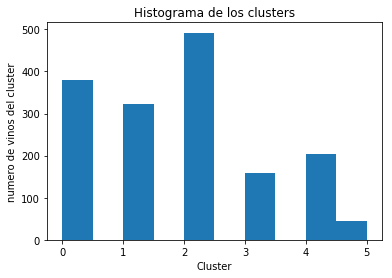

In [14]:
plt.hist(clus.labels_)
plt.title('Histograma de los clusters')
plt.xlabel('Cluster')
plt.ylabel('numero de vinos del cluster')

In [15]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [17]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [18]:
Z = linkage(df_norm, 'ward')


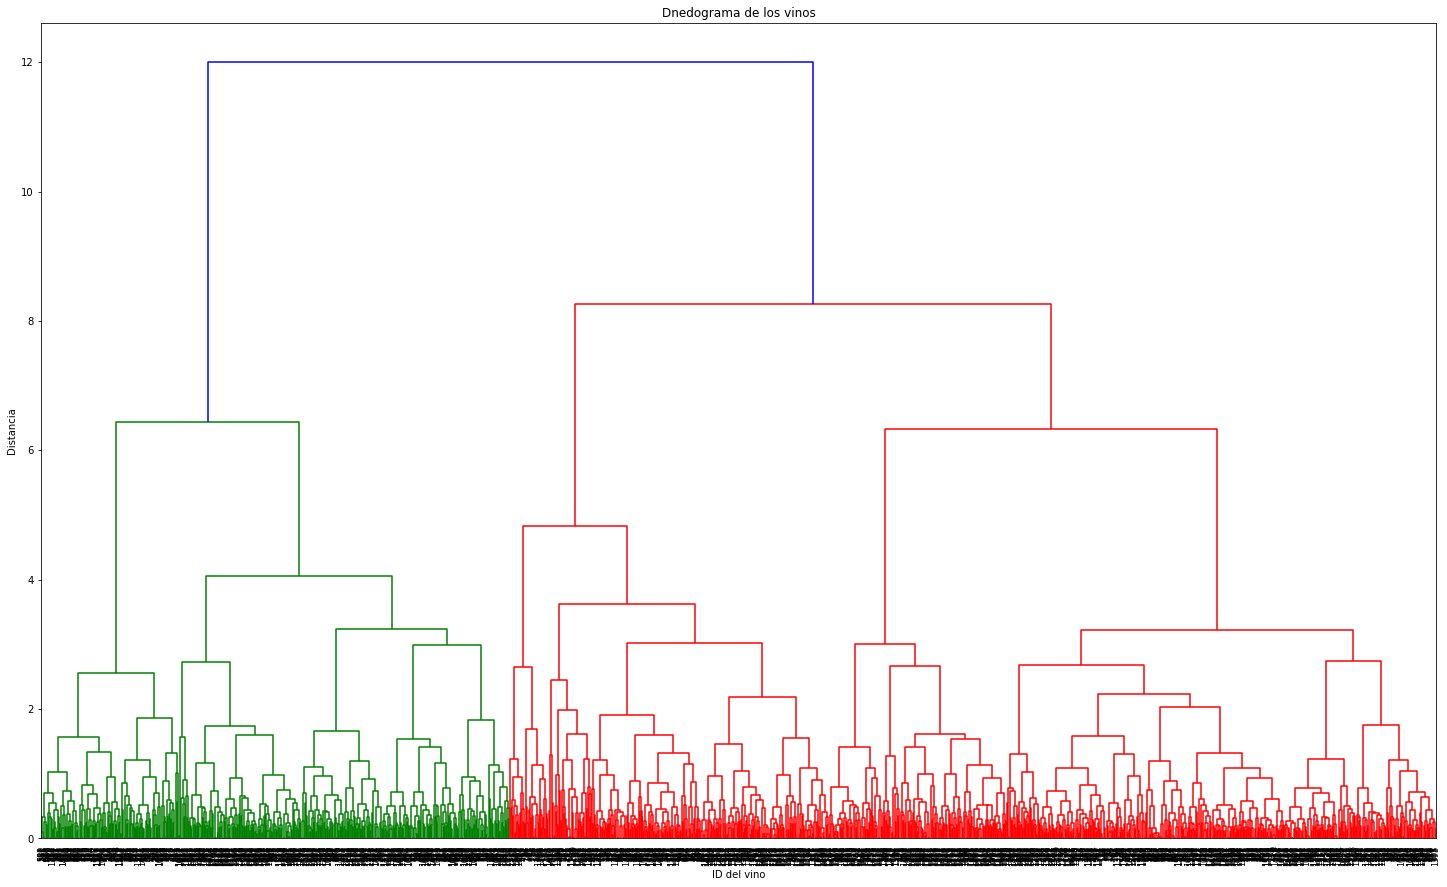

In [21]:
plt.figure(figsize=(25,15))
plt.title('Dnedograma de los vinos')
plt.xlabel('ID del vino')
plt.ylabel('Distancia')
dendrogram(Z,leaf_rotation=90., leaf_font_size=8.)
plt.show()

# K-means

In [22]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [23]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
model.labels_

array([3, 3, 3, ..., 1, 3, 4])

In [28]:
md_k = pd.Series(model.labels_)

In [29]:
df_norm['clust_h'] = md_h
df_norm['clus_k'] = md_k

In [31]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clus_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


(array([214.,   0., 217.,   0., 276.,   0., 371.,   0., 231., 290.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

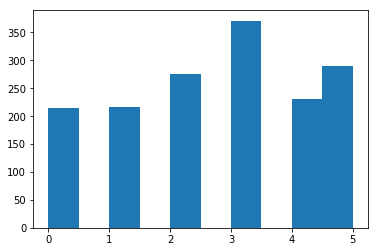

In [32]:
plt.hist(md_k)

In [33]:
model.cluster_centers_

array([[0.59813084, 0.20197478, 0.55060748, 0.13391371, 0.16462796,
        0.1435435 , 0.09530729, 0.66112232, 0.31691074, 0.24755163,
        0.29983225, 0.55700935],
       [0.17572693, 0.31794079, 0.09626728, 0.09364939, 0.0953894 ,
        0.24923736, 0.12429369, 0.32021898, 0.57687144, 0.18731201,
        0.49722321, 0.61751152],
       [0.32102091, 0.27722355, 0.30981884, 0.16597181, 0.12994484,
        0.40117881, 0.31135095, 0.54340112, 0.42862034, 0.19330903,
        0.21798588, 0.45507246],
       [0.23934356, 0.38307241, 0.0702965 , 0.09301961, 0.12064582,
        0.1656543 , 0.10701666, 0.48164662, 0.52134049, 0.15349355,
        0.23478471, 0.42857143],
       [0.36949776, 0.15467295, 0.43337662, 0.10733559, 0.10537042,
        0.16590452, 0.08404081, 0.40418343, 0.41244844, 0.23993571,
        0.50642691, 0.71515152],
       [0.33606958, 0.27609825, 0.28575862, 0.08755314, 0.13985954,
        0.13686255, 0.12494212, 0.52015292, 0.41058919, 0.18913896,
        0.21151194,

In [34]:
model.inertia_

188.5497753282408

# Interpretacion final

In [35]:
df_norm.groupby('clus_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clus_k,,,,,,,,,,,,,
0,0.598131,0.201975,0.550607,0.133914,0.164628,0.143544,0.095307,0.661122,0.316911,0.247552,0.299832,0.557009,2.462617
1,0.175727,0.317941,0.096267,0.093649,0.095389,0.249237,0.124294,0.320219,0.576871,0.187312,0.497223,0.617512,3.414747
2,0.321021,0.277224,0.309819,0.165972,0.129945,0.401179,0.311351,0.543401,0.428620,0.193309,0.217986,0.455072,1.050725
3,0.239344,0.383072,0.070296,0.093020,0.120646,0.165654,0.107017,0.481647,0.521340,0.153494,0.234785,0.428571,2.129380
4,0.369498,0.154673,0.433377,0.107336,0.105370,0.165905,0.084041,0.404183,0.412448,0.239936,0.506427,0.715152,0.082251
5,0.336070,0.276098,0.285759,0.087553,0.139860,0.136863,0.124942,0.520153,0.410589,0.189139,0.211512,0.482759,1.548276
